In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import VOCDetection

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image
try:
    from defusedxml.ElementTree import parse as ET_parse
except ImportError:
    from xml.etree.ElementTree import parse as ET_parse

# 기본 VOCDetection Dataset

In [2]:
data_path = '../../data'
dataset_default = VOCDetection(root=data_path, year='2012', image_set='train', transform=transforms.ToTensor())
dataset_default

Dataset VOCDetection
    Number of datapoints: 5717
    Root location: ../../data
    StandardTransform
Transform: ToTensor()

In [3]:
dataset_loader = DataLoader(dataset_default)
iter(dataset_loader).next()

[tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.7922, 0.7961, 0.8000],
           [1.0000, 1.0000, 1.0000,  ..., 0.7961, 0.7961, 0.7922],
           [1.0000, 1.0000, 1.0000,  ..., 0.8078, 0.8039, 0.8039],
           ...,
           [0.8039, 0.7608, 0.8078,  ..., 0.5373, 0.4706, 0.4667],
           [0.7529, 0.7569, 0.7569,  ..., 0.4353, 0.4235, 0.4784],
           [0.6980, 0.7059, 0.7255,  ..., 0.3216, 0.2863, 0.3137]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8078, 0.8118],
           [1.0000, 1.0000, 1.0000,  ..., 0.8078, 0.8078, 0.8039],
           [1.0000, 1.0000, 1.0000,  ..., 0.8196, 0.8157, 0.8157],
           ...,
           [0.7490, 0.7059, 0.7529,  ..., 0.5020, 0.4392, 0.4431],
           [0.6980, 0.7020, 0.7020,  ..., 0.4157, 0.4039, 0.4667],
           [0.6431, 0.6510, 0.6706,  ..., 0.3020, 0.2667, 0.3020]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 0.9725, 0.9765, 0.9804],
           [1.0000, 1.0000, 1.0000,  ..., 0.9765, 0.9765, 0.9725],
           [1.0000, 1.00

# Customize

In [4]:
classes = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
            'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
            'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

class myVOCDetection(VOCDetection):
    def __getitem__(self, index):
        img = Image.open(self.images[index]).convert('RGB')
        target = self.parse_voc_xml(ET_parse(self.annotations[index]).getroot())
        
        targets, labels = [], []
        for t in target['annotation']['object']:
            bbox = [int(t['bndbox']['xmin']), 
                    int(t['bndbox']['ymin']),
                    int(t['bndbox']['xmax']),
                    int(t['bndbox']['ymax'])]
            label = classes.index(t['name'])
            
            targets.append(bbox)
            labels.append(label)
            
        labels = torch.tensor(labels)
        if self.transform:
            img = self.transform(img)
            targets = self.transform(np.array(targets))
        
        return img, targets, labels


### Single Batch

In [5]:
# pp = pprint.PrettyPrinter(width=20, indent=4)
data_path = '../../data'
datasets = myVOCDetection(root=data_path, year='2012', image_set='train', transform=transforms.ToTensor())
dataloader = DataLoader(datasets, batch_size=1)

images, bboxes, labels = iter(dataloader).next()
images, bboxes, labels

(tensor([[[[1.0000, 1.0000, 1.0000,  ..., 0.7922, 0.7961, 0.8000],
           [1.0000, 1.0000, 1.0000,  ..., 0.7961, 0.7961, 0.7922],
           [1.0000, 1.0000, 1.0000,  ..., 0.8078, 0.8039, 0.8039],
           ...,
           [0.8039, 0.7608, 0.8078,  ..., 0.5373, 0.4706, 0.4667],
           [0.7529, 0.7569, 0.7569,  ..., 0.4353, 0.4235, 0.4784],
           [0.6980, 0.7059, 0.7255,  ..., 0.3216, 0.2863, 0.3137]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8078, 0.8118],
           [1.0000, 1.0000, 1.0000,  ..., 0.8078, 0.8078, 0.8039],
           [1.0000, 1.0000, 1.0000,  ..., 0.8196, 0.8157, 0.8157],
           ...,
           [0.7490, 0.7059, 0.7529,  ..., 0.5020, 0.4392, 0.4431],
           [0.6980, 0.7020, 0.7020,  ..., 0.4157, 0.4039, 0.4667],
           [0.6431, 0.6510, 0.6706,  ..., 0.3020, 0.2667, 0.3020]],
 
          [[1.0000, 1.0000, 1.0000,  ..., 0.9725, 0.9765, 0.9804],
           [1.0000, 1.0000, 1.0000,  ..., 0.9765, 0.9765, 0.9725],
           [1.0000, 1.00

In [6]:
print('Number of data :', len(datasets))
print('Batch of dataloader :', len(images))
print('Shape of image :', images[0].shape)
print('Shape of bboxes :' , bboxes[0].shape)
print('Shape of labels :', labels[0].shape )

Number of data : 5717
Batch of dataloader : 1
Shape of image : torch.Size([3, 442, 500])
Shape of bboxes : torch.Size([1, 2, 4])
Shape of labels : torch.Size([2])


### Multi Batch
Before collate_fn

In [7]:
# pp = pprint.PrettyPrinter(width=20, indent=4)
data_path = '../../data'
datasets = myVOCDetection(root=data_path, year='2012', image_set='train', transform=transforms.ToTensor())
dataloader = DataLoader(datasets, batch_size=2)

images, bboxes, labels = iter(dataloader).next()

print('Number of data :', len(datasets))
print('Batch of dataloader :', len(images))
print('Shape of image :', images[0].shape)
print('Shape of bboxes :' , bboxes[0].shape)
print('Shape of labels :', labels[0].shape )

RuntimeError: stack expects each tensor to be equal size, but got [3, 442, 500] at entry 0 and [3, 327, 500] at entry 1

### Multi Batch
After collate_fn

In [8]:
 def collate_fn(batch):
    return tuple(zip(*batch))

# pp = pprint.PrettyPrinter(width=20, indent=4)
data_path = '../../data'
datasets = myVOCDetection(root=data_path, year='2012', image_set='train', transform=transforms.ToTensor())
dataloader = DataLoader(datasets, batch_size=2, collate_fn=collate_fn)

images, bboxes, labels = iter(dataloader).next()
images

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7922, 0.7961, 0.8000],
          [1.0000, 1.0000, 1.0000,  ..., 0.7961, 0.7961, 0.7922],
          [1.0000, 1.0000, 1.0000,  ..., 0.8078, 0.8039, 0.8039],
          ...,
          [0.8039, 0.7608, 0.8078,  ..., 0.5373, 0.4706, 0.4667],
          [0.7529, 0.7569, 0.7569,  ..., 0.4353, 0.4235, 0.4784],
          [0.6980, 0.7059, 0.7255,  ..., 0.3216, 0.2863, 0.3137]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8078, 0.8118],
          [1.0000, 1.0000, 1.0000,  ..., 0.8078, 0.8078, 0.8039],
          [1.0000, 1.0000, 1.0000,  ..., 0.8196, 0.8157, 0.8157],
          ...,
          [0.7490, 0.7059, 0.7529,  ..., 0.5020, 0.4392, 0.4431],
          [0.6980, 0.7020, 0.7020,  ..., 0.4157, 0.4039, 0.4667],
          [0.6431, 0.6510, 0.6706,  ..., 0.3020, 0.2667, 0.3020]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.9725, 0.9765, 0.9804],
          [1.0000, 1.0000, 1.0000,  ..., 0.9765, 0.9765, 0.9725],
          [1.0000, 1.0000, 1.0000,  ...,

In [9]:
print('Number of data :', len(datasets))
print('Batch of dataloader :', len(images))
print('Shape of image :', images[0].shape)
print('Shape of bboxes :' , bboxes[0].shape)
print('Shape of labels :', labels[0].shape )

Number of data : 5717
Batch of dataloader : 2
Shape of image : torch.Size([3, 442, 500])
Shape of bboxes : torch.Size([1, 2, 4])
Shape of labels : torch.Size([2])


# Visualization

In [14]:
def pascal_show(dataloader, figsize):
    CLASSES = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
                'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
                'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
    
    images, bboxes, labels = iter(dataloader).next()
    
    fig, axes = plt.subplots(*figsize, figsize=(15,10))
    axes = axes.ravel()
    for i in range(len(images)):
        img = images[i].permute(1,2,0)
        
        for box, label in zip(bboxes[i][0], labels[i]):
            rect = patches.Rectangle((box[0], box[1]), 
                                     box[2]-box[0], 
                                     box[3]-box[1], 
                                     linewidth=3, edgecolor='r', facecolor='none')
            axes[i].add_patch(rect)
            axes[i].text(box[0], box[1], CLASSES[label], fontsize=15)
            
        axes[i].imshow(img)
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show() 

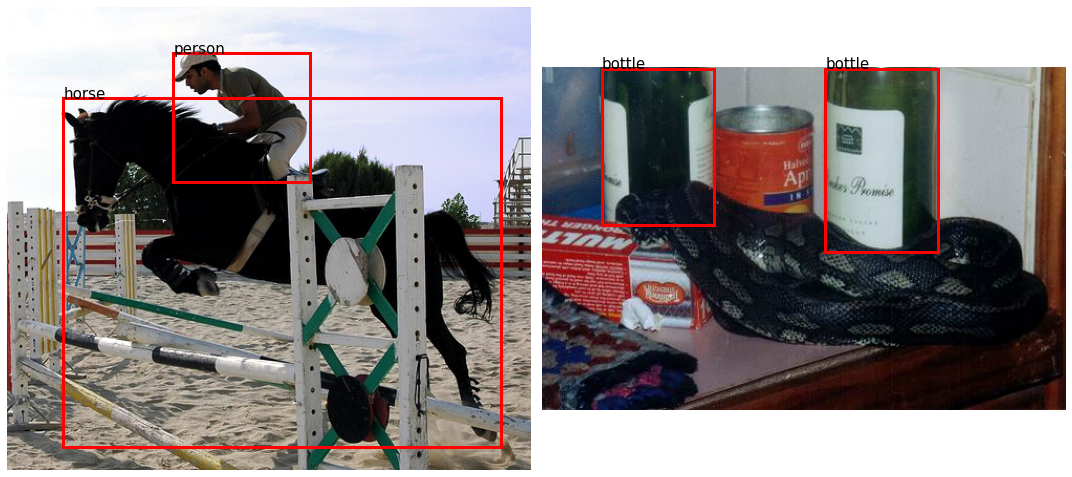

In [15]:
pascal_show(dataloader, figsize=(1,2))

# Result

In [ ]:
classes = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
            'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
            'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

class myVOCDetection(VOCDetection):
    def __getitem__(self, index):
        img = Image.open(self.images[index]).convert('RGB')
        target = self.parse_voc_xml(ET_parse(self.annotations[index]).getroot())
        
        targets, labels = [], []
        for t in target['annotation']['object']:
            bbox = [int(t['bndbox']['xmin']), 
                    int(t['bndbox']['ymin']),
                    int(t['bndbox']['xmax']),
                    int(t['bndbox']['ymax'])]
            label = classes.index(t['name'])
            
            targets.append(bbox)
            labels.append(label)
            
        labels = torch.tensor(labels)
        if self.transform:
            img = self.transform(img)
            targets = self.transform(np.array(targets))
        
        return img, targets, labels
    
def collate_fn(batch):
    return tuple(zip(*batch))

data_path = '../../data'
datasets = myVOCDetection(root=data_path, year='2012', image_set='train', transform=transforms.ToTensor())
dataloader = DataLoader(datasets, batch_size=2, collate_fn=collate_fn)

images, bboxes, labels = iter(dataloader).next()
images